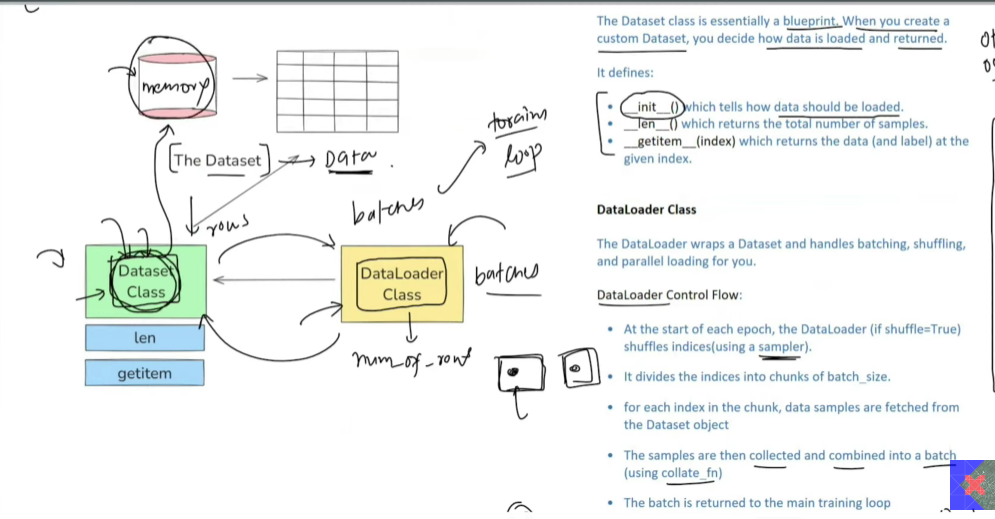

In [1]:
from sklearn.datasets import make_classification
import torch

In [2]:
# Create a synthetic dataset using sklearn
# Step 1: Create a synthetic classification dataset using sklearn
X, y = make_classification(
    n_samples=10,       # Number of samples
    n_features=2,       # Number of features
    n_informative=2,    # Number of informative features
    n_redundant=0,      # Number of redundant features
    n_classes=2,        # Number of classes
    random_state=42     # For reproducibility
)

In [3]:
X

array([[ 1.06833894, -0.97007347],
       [-1.14021544, -0.83879234],
       [-2.8953973 ,  1.97686236],
       [-0.72063436, -0.96059253],
       [-1.96287438, -0.99225135],
       [-0.9382051 , -0.54304815],
       [ 1.72725924, -1.18582677],
       [ 1.77736657,  1.51157598],
       [ 1.89969252,  0.83444483],
       [-0.58723065, -1.97171753]])

In [5]:
X.shape

(10, 2)

In [6]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [7]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

In [8]:
X

tensor([[ 1.0683, -0.9701],
        [-1.1402, -0.8388],
        [-2.8954,  1.9769],
        [-0.7206, -0.9606],
        [-1.9629, -0.9923],
        [-0.9382, -0.5430],
        [ 1.7273, -1.1858],
        [ 1.7774,  1.5116],
        [ 1.8997,  0.8344],
        [-0.5872, -1.9717]])

In [9]:
y

tensor([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [11]:
from torch.utils.data import Dataset, DataLoader

In [32]:
class CustomDataset(Dataset):   # class CustomDataset is inherited from Dataset class

  def __init__(self, features, labels):

    self.features = features
    self.labels = labels

  def __len__(self):

    return self.features.shape[0]

  def __getitem__(self, index):
      # can do various transformation here(resize , RGB to grey scale ....)
    return self.features[index], self.labels[index]

In [21]:
dataset = CustomDataset(X,y)    # Object of CustomDataset class

In [22]:
len(dataset)

10

In [23]:
dataset[2]

(tensor([-2.8954,  1.9769]), tensor(0))

In [24]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Can parallelize the process of batch fromation using this class

In [25]:
for batch_features, batch_labels in dataloader:

  print(batch_features)
  print(batch_labels)
  print("-"*50)

tensor([[-2.8954,  1.9769],
        [-0.9382, -0.5430]])
tensor([0, 1])
--------------------------------------------------
tensor([[-1.1402, -0.8388],
        [ 1.7273, -1.1858]])
tensor([0, 1])
--------------------------------------------------
tensor([[-0.7206, -0.9606],
        [ 1.7774,  1.5116]])
tensor([0, 1])
--------------------------------------------------
tensor([[ 1.8997,  0.8344],
        [-0.5872, -1.9717]])
tensor([1, 0])
--------------------------------------------------
tensor([[-1.9629, -0.9923],
        [ 1.0683, -0.9701]])
tensor([0, 1])
--------------------------------------------------


Application

In [27]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
df.shape

(569, 33)

In [30]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [31]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train

array([[ 1.17322459, -0.16121285,  1.08407192, ...,  0.64517737,
         0.46048206, -0.81532949],
       [-0.63993663,  0.53030085, -0.62391587, ..., -0.42042348,
        -0.96527167,  0.81305678],
       [-0.47100857, -0.45790961, -0.47589298, ..., -0.14789913,
         0.18988951, -0.42471129],
       ...,
       [-0.15567618,  0.60038669, -0.20151908, ..., -0.81252172,
        -0.7421515 , -0.76886592],
       [-0.64838304, -0.13317851, -0.57893654, ...,  0.60690148,
         2.92113362,  3.010892  ],
       [-0.86798952, -0.50229731, -0.85208373, ..., -0.30345235,
        -0.2136257 ,  1.7466505 ]])

In [36]:
y_train

,diagnosis
186,M
450,B
497,B
413,B
168,M
...,...
266,B
193,M
267,B
31,M


In [37]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [38]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [39]:
X_train_tensor.shape

torch.Size([455, 30])

In [40]:
y_train_tensor.shape

torch.Size([455])

In [41]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = features
    self.labels = labels

  def __len__(self):

    return len(self.features)

  def __getitem__(self, idx):

    return self.features[idx], self.labels[idx]



In [42]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [43]:
train_dataset[10]

(tensor([ 0.8579,  0.6541,  0.7978,  0.7624,  0.0653, -0.2849,  0.0201,  0.4226,
          0.1857, -1.0168,  0.0479, -0.8601, -0.0260,  0.0988, -0.8698, -0.7629,
         -0.3949, -0.3144, -1.1033, -0.8284,  1.0896,  0.5738,  0.9838,  0.9650,
          1.0168, -0.0067,  0.5578,  1.2775,  0.4763, -0.4739]),
 tensor(1.))

In [44]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [45]:
import torch.nn as nn


class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

In [46]:
learning_rate = 0.1
epochs = 25

In [47]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loss function
loss_function = nn.BCELoss()

In [48]:
# Mini Batch
# define loop
for epoch in range(epochs):

  for batch_features, batch_labels in train_loader:

    # forward pass
    y_pred = model(batch_features)

    # loss calculate
    loss = loss_function(y_pred, batch_labels.view(-1,1))

    # clear gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # parameters update
    optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.1602102369070053
Epoch: 2, Loss: 0.2122979313135147
Epoch: 3, Loss: 0.04777534678578377
Epoch: 4, Loss: 0.15416459739208221
Epoch: 5, Loss: 0.09186647087335587
Epoch: 6, Loss: 0.08706117421388626
Epoch: 7, Loss: 0.013286261819303036
Epoch: 8, Loss: 0.010577495209872723
Epoch: 9, Loss: 0.07291626185178757
Epoch: 10, Loss: 0.034045007079839706
Epoch: 11, Loss: 0.035244397819042206
Epoch: 12, Loss: 0.05302420258522034
Epoch: 13, Loss: 0.004537498112767935
Epoch: 14, Loss: 0.014843354932963848
Epoch: 15, Loss: 0.1359321027994156
Epoch: 16, Loss: 0.02907862327992916
Epoch: 17, Loss: 0.024113373830914497
Epoch: 18, Loss: 0.11685973405838013
Epoch: 19, Loss: 0.00721493037417531
Epoch: 20, Loss: 0.08835642039775848
Epoch: 21, Loss: 0.0022738357074558735
Epoch: 22, Loss: 0.01837141625583172
Epoch: 23, Loss: 0.6610730886459351
Epoch: 24, Loss: 0.09810782223939896
Epoch: 25, Loss: 0.019620640203356743


In [49]:
# Model evaluation using test_loader
model.eval()  # Set the model to evaluation mode
accuracy_list = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Forward pass
        y_pred = model(batch_features)
        y_pred = (y_pred > 0.8).float()  # Convert probabilities to binary predictions

        # Calculate accuracy for the current batch
        batch_accuracy = (y_pred.view(-1) == batch_labels).float().mean().item()
        accuracy_list.append(batch_accuracy)

# Calculate overall accuracy
overall_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f'Accuracy: {overall_accuracy:.4f}')


Accuracy: 0.9470
